# Bank marketing Analysis using Machine Learning

Problem Statement: Improve marketing campaign of a bank by analyzing their past marketing campaign data andrecommending which customer to target.

Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [46]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
#loading data
train = pd.read_csv('bank-additional-full.csv',sep=';')

In [49]:
#checking the shape of the dataset i.e., no. of rows and columns
train.shape

(41188, 21)

In [50]:
#there 41188 rows and 21 columns in our dataset

In [51]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [54]:
#Analysing the target variable i.e, y
train['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

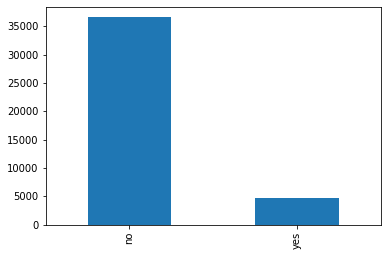

In [55]:
train['y'].value_counts().plot.bar()#distribution of target variable

In [56]:
#in our target variable there are 36548 'no' values and 4640 'yes' values which means our data is imbalanced

In [57]:
#checking the presence of null values in the data
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [58]:
#there are no null values in our data

# Numeric Columns

In [59]:
#Storing all the numeric columns of the data in a separate variable
numerical_cols = list(train.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# Categorical Columns 

In [60]:
#Storing all the categorical columns of the data in a separate variable
category_cols = list(train.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

Categorical variables were looked at first. Visualizations were created.

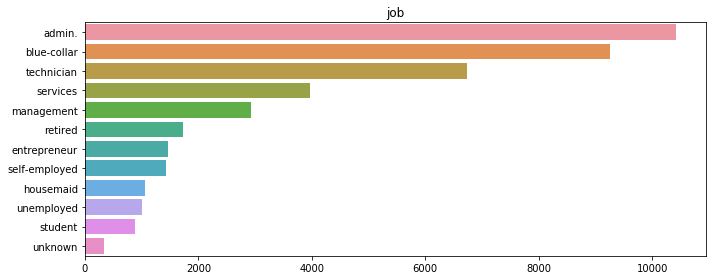

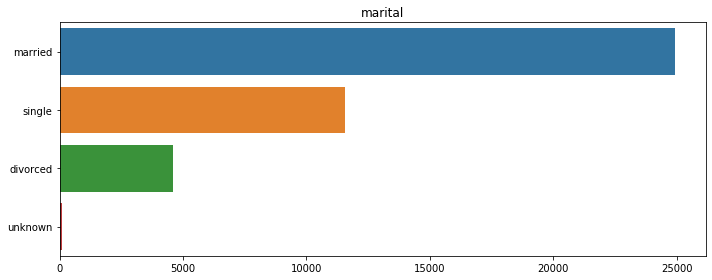

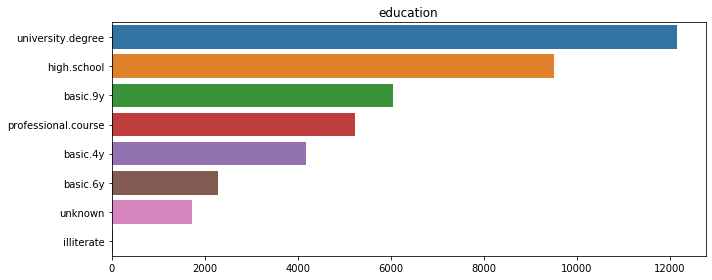

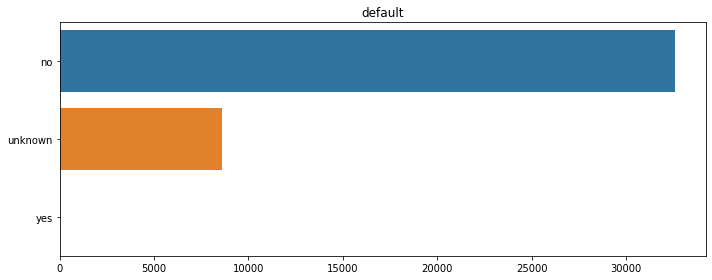

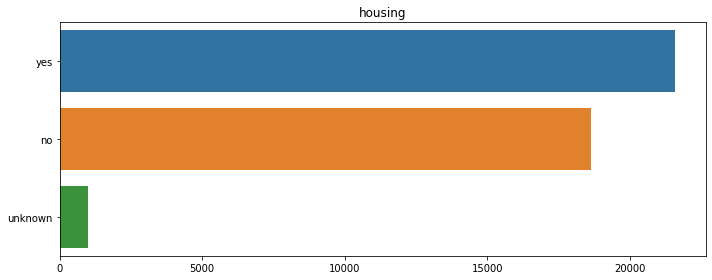

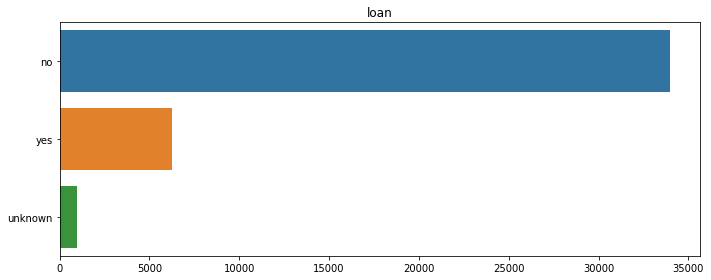

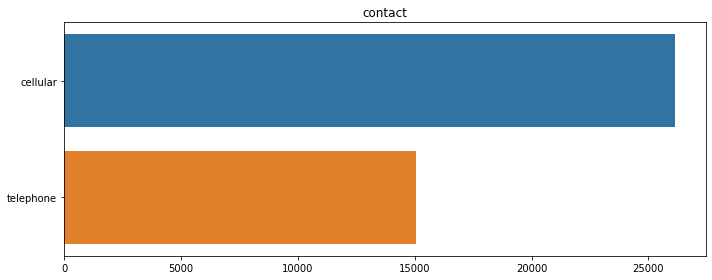

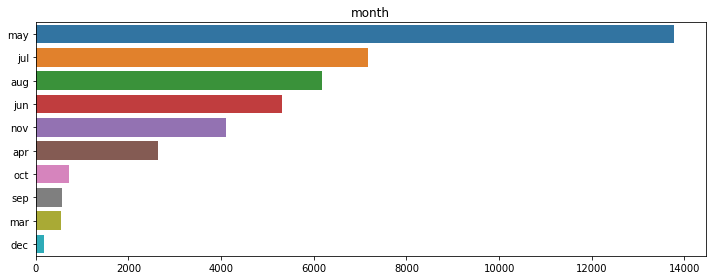

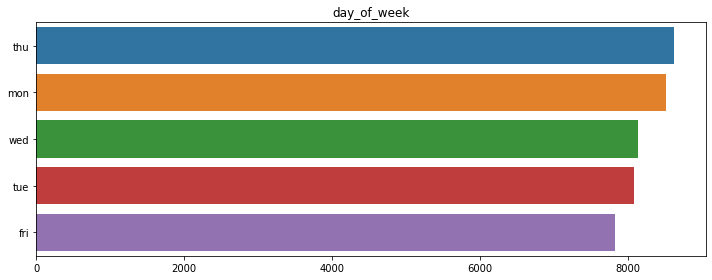

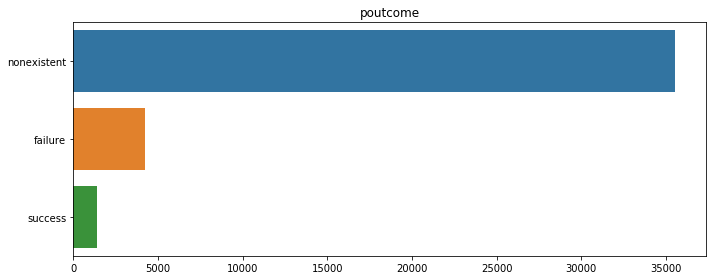

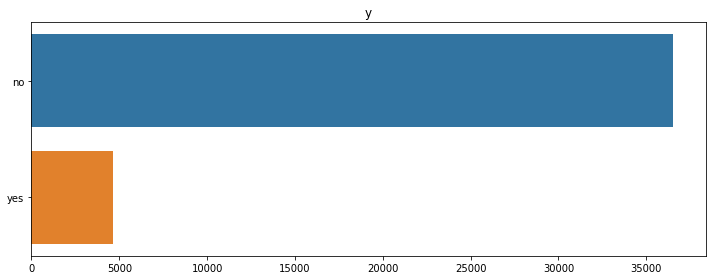

In [61]:
#checking bar plot distribution of all categorical columns
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(train[col].value_counts().values, train[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

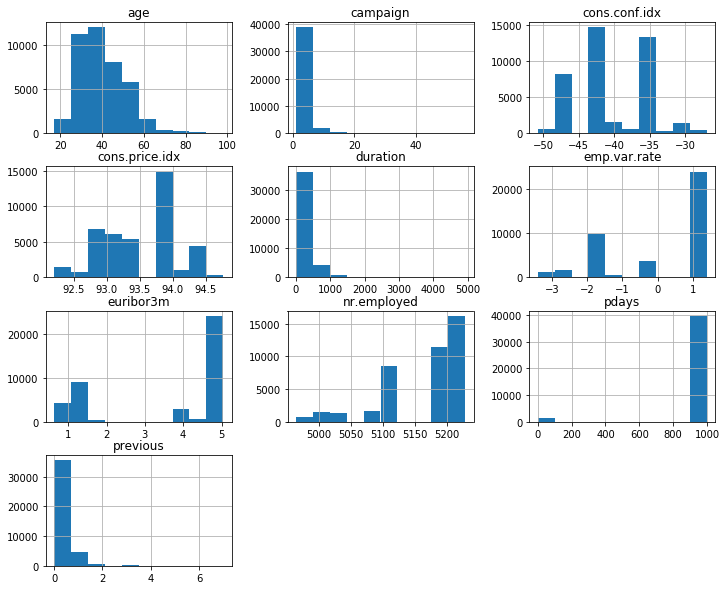

In [62]:
dist=train.hist(figsize=(12,10))                                                   #display numerical feature distribution

In [63]:
train.job.value_counts()#checking the frequency distribution of 'job' column

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [64]:
#analysing the 'age'
print('Min age: ', train['age'].max())
print('Max age: ', train['age'].min())
print('Null Values: ', train['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


AxesSubplot(0.125,0.125;0.775x0.755)


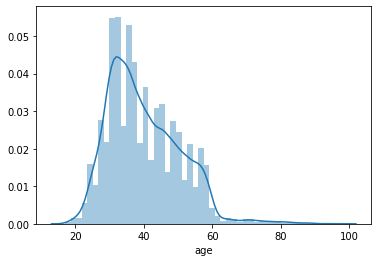

In [65]:
print(sns.distplot(train['age']))#right skewed

Text(0.5, 1.0, 'AGE')


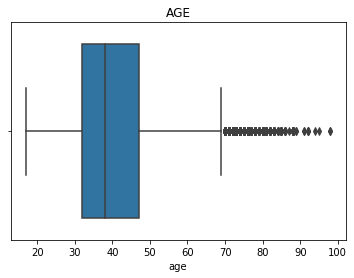

In [66]:
print(sns.boxplot(x=train['age']).set_title('AGE'))
#from the box plot it is clear that ages above 69 are outliers

In [67]:
#applying log to 'age' in order to fix the skewness
train['age']=np.log(train['age'])

AxesSubplot(0.125,0.125;0.775x0.755)


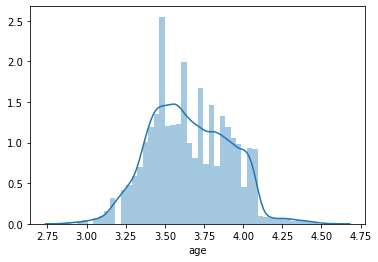

In [68]:
print(sns.distplot(train['age']))

Text(0.5, 1.0, 'PDAYS')


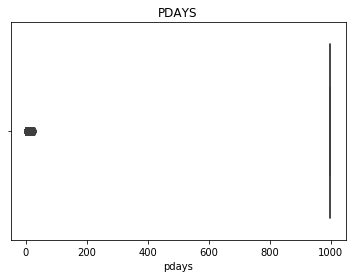

In [69]:
print(sns.boxplot(x=train['pdays']).set_title('PDAYS'))

In [70]:
train.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [71]:
#converting duration of call from seconds to minutes
train['duration'] = train['duration'].apply(lambda n:n/60).round(2)

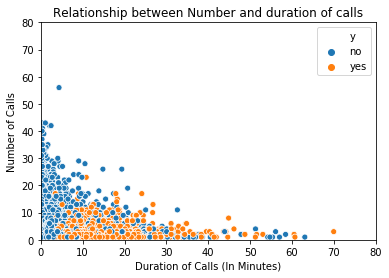

In [72]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = train,hue = 'y')

plt.axis([0,80,0,80])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (In Minutes)')
plt.title('Relationship between Number and duration of calls')
plt.show()

Text(0.5, 1.0, 'DURATION')


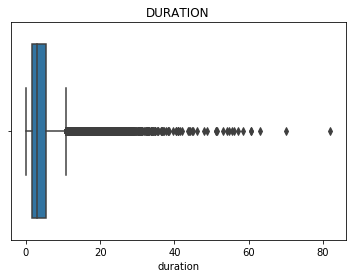

In [73]:
print(sns.boxplot(x=train['duration']).set_title('DURATION'))

In [74]:
train.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

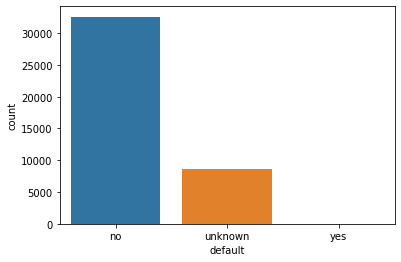

In [75]:
sns.countplot(train.default)

In [76]:
train.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

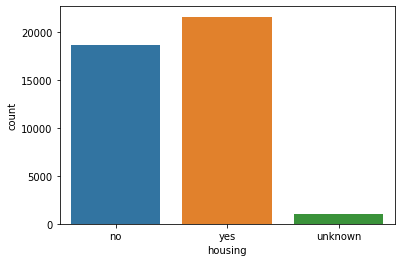

In [77]:
sns.countplot(train.housing)

In [78]:
train.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

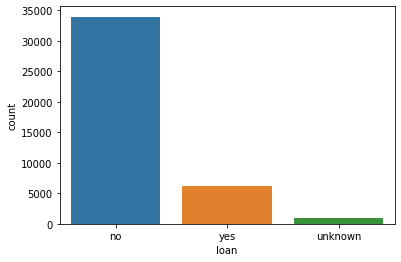

In [79]:
sns.countplot(train.loan)

In [80]:
train.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

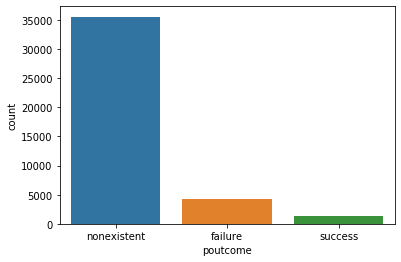

In [81]:
sns.countplot(train.poutcome)

In [82]:
train.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

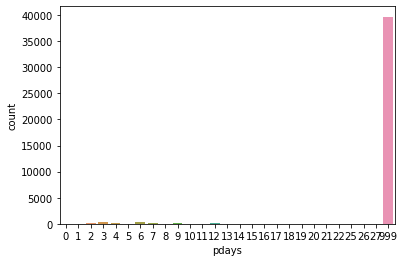

In [83]:
sns.countplot(train.pdays)

In [84]:
train['y'].replace({'no':0,'yes':1},inplace=True)

Among numerical features, fortunately only column (‘pdays’) had any missing values. Unfortunately, missing values made up the majority of the column.


# Bivariate Analysis

Heatmap using seaborn package was created to show us any particularly strong correlations between the independent variables and the target variable outcome.

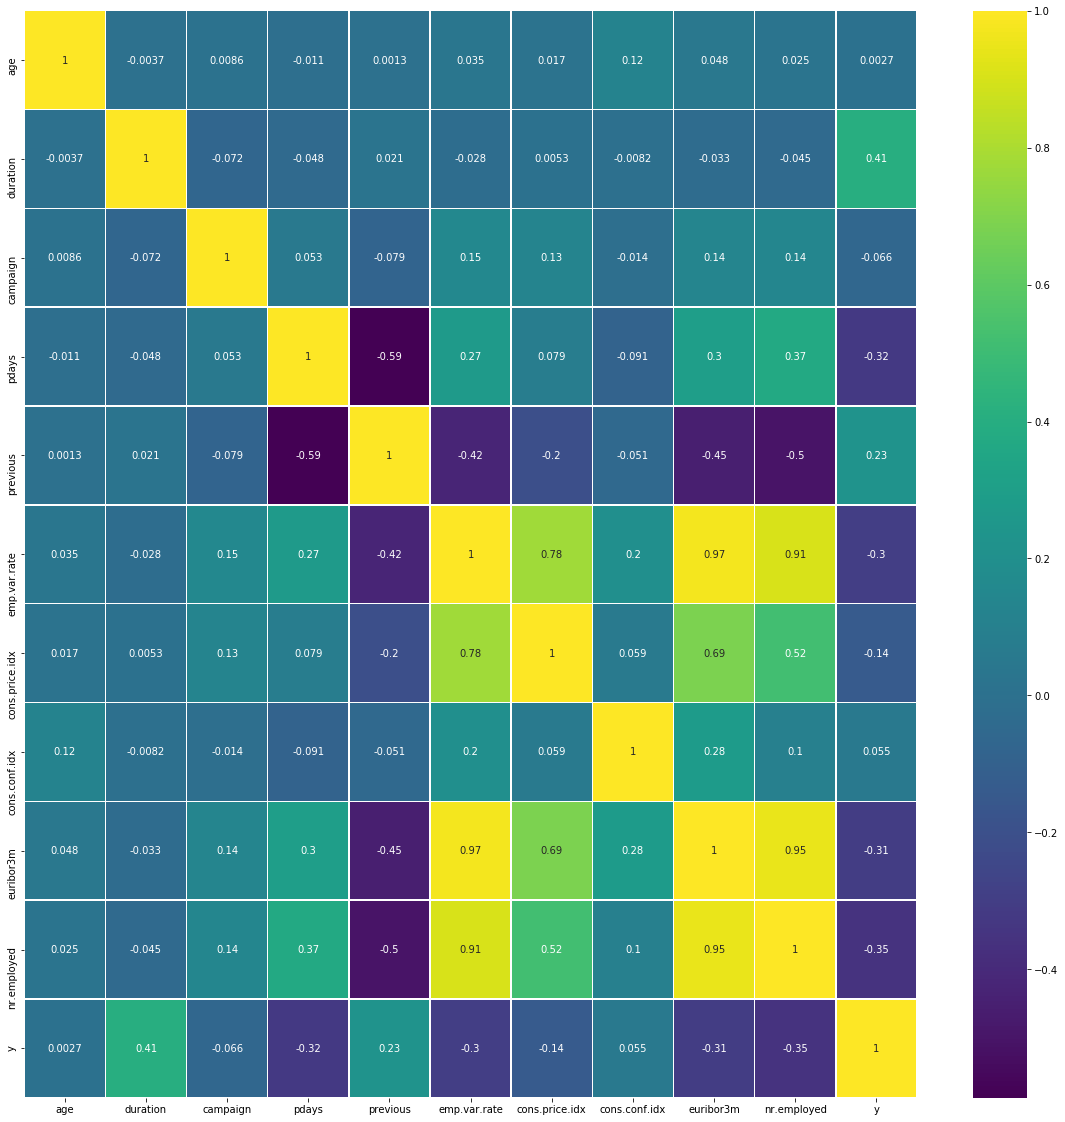

In [85]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

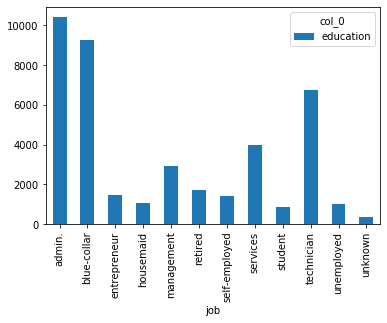

In [86]:
cross_tab = pd.crosstab(index = train["job"],  # Make a crosstab
                              columns="education")      # Name the count column

cross_tab.plot.bar()

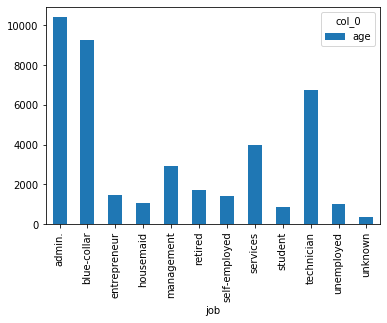

In [87]:
cross_tab = pd.crosstab(index = train["job"],     # Make a crosstab
                              columns="age")      # Name the count column

cross_tab.plot.bar()

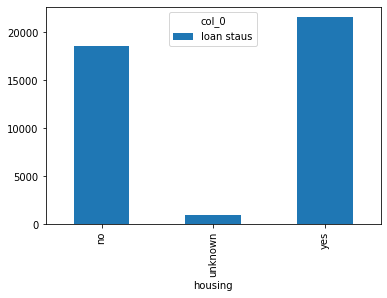

In [88]:
cross_tab = pd.crosstab(index = train["housing"],        # Make a crosstab
                              columns="loan staus")      # Name the count column

cross_tab.plot.bar()

In [89]:
pd.crosstab(train['job'],train['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


### INFERRING FRO THE CROSS TABULATION

Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

Inferring jobs from education : If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

Inferring jobs from age: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.


In [145]:
train = train.drop(train[train.duration < 10/60].index, axis = 0, inplace = False)#drop the rows where call duration is of less than 10seconds

# Treatment Of Missing Value /Unknown value

In [91]:
train.default.replace('unknown','no',inplace=True)

In [92]:
train['default'] = train.default.replace('unknown',train.default.mode([0]))

In [93]:
train.housing.replace('unknown',train.housing.mode()[0],inplace=True)

In [94]:
train['loan'] = train.default.replace('unknown',train.loan.mode()[0])

In [95]:
train.loc[(train['age']>60) & (train['job']=='unknown'), 'job'] = 'retired'

In [96]:
train.loc[(train['education']=='unknown') & (train['job']=='management'), 'education'] = 'university.degree'

In [97]:
train.loc[(train['education']=='unknown') & (train['job']=='services'), 'education'] = 'high.school'

In [98]:
train.loc[(train['education']=='unknown') & (train['job']=='housemaid'), 'education'] = 'basic.4y'

In [99]:
train.loc[(train['job'] == 'unknown') & (train['education']=='basic.4y'), 'job'] = 'blue-collar'

In [100]:
train.loc[(train['job'] == 'unknown') & (train['education']=='basic.6y'), 'job'] = 'blue-collar'

In [101]:
train.loc[(train['job'] == 'unknown') & (train['education']=='basic.9y'), 'job'] = 'blue-collar'

In [102]:
train.loc[(train['job']=='unknown') & (train['education']=='professional.course'), 'job'] = 'technician'

In [103]:
train.job.value_counts()

admin.           10342
blue-collar       9295
technician        6707
services          3943
management        2909
retired           1715
entrepreneur      1439
self-employed     1413
housemaid         1053
unemployed        1005
student            865
unknown            212
Name: job, dtype: int64

earlier there were 330 unknown values in the 'job' column now after treatment there are 212 unknown values

In [104]:
train.pdays.describe()

count    40898.000000
mean       962.313414
std        187.309653
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [105]:
train['pdays'] = np.where(train['pdays'] == 999,train[train['pdays'] < 999]['pdays'].mean(),train['pdays'])

In [106]:
train.pdays.describe()

count    40898.000000
mean         6.009927
std          0.733523
min          0.000000
25%          6.009927
50%          6.009927
75%          6.009927
max         27.000000
Name: pdays, dtype: float64

To handle the missing values in colun 'pdays', ‘pdays’ values equal to 999 was replaced by the mean of other 'pdays' values.

In [107]:
train.loc[train["age"] < 30,  "age"] = 20
train.loc[(train["age"] >= 30) & (train["age"] <= 39), "age"] = 30
train.loc[(train["age"] >= 40) & (train["age"] <= 49), "age"] = 40
train.loc[(train["age"] >= 50) & (train["age"] <= 59), "age"] = 50
train.loc[train["age"] >= 60, "age"] = 60

In [108]:
#replacing 'non-existent' with 1 'failure' with 2 and 'sucess' with 3 in tthe 'poutcome' column
train['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [109]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,20.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6.009927,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,20.0,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.009927,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,20.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6.009927,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,20.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6.009927,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,20.0,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.009927,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [110]:
train.tail(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41088,20.0,student,single,basic.4y,no,yes,no,telephone,nov,tue,...,1,13.000000,2,3,-1.1,94.767,-50.8,1.049,4963.6,1
41089,20.0,blue-collar,divorced,professional.course,no,yes,no,telephone,nov,tue,...,2,7.000000,2,3,-1.1,94.767,-50.8,1.049,4963.6,1
41090,20.0,admin.,single,university.degree,no,no,no,cellular,nov,wed,...,2,3.000000,6,3,-1.1,94.767,-50.8,1.048,4963.6,0
41091,20.0,admin.,single,university.degree,no,yes,no,cellular,nov,wed,...,1,6.009927,0,1,-1.1,94.767,-50.8,1.048,4963.6,0
41092,20.0,admin.,single,university.degree,no,yes,no,cellular,nov,wed,...,1,2.000000,5,3,-1.1,94.767,-50.8,1.048,4963.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,20.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,6.009927,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,20.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,6.009927,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,20.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,6.009927,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,20.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,6.009927,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


# MODEL BUILDING

1)Logistic Regression
2)Random Forest

Models of both algorithms are evaluated based on different metrics , here we have used :
1. Accuracy Score
2. Precision and Recall 

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
import sklearn.metrics as metrics

APPLYING LABEL ENCODING

In [112]:
labelenc = LabelEncoder()
train['contact']     = labelenc.fit_transform(train['contact']) 
train['month']       = labelenc.fit_transform(train['month']) 
train['day_of_week'] = labelenc.fit_transform(train['day_of_week']) 
train['job']         = labelenc.fit_transform(train['job']) 
train['marital']     = labelenc.fit_transform(train['marital']) 
train['education']   = labelenc.fit_transform(train['education']) 
train['default']     = labelenc.fit_transform(train['default']) 
train['housing']     = labelenc.fit_transform(train['housing']) 
train['loan']        = labelenc.fit_transform(train['loan'])
train['poutcome']    = labelenc.fit_transform(train['poutcome']) 
train['y']           = labelenc.fit_transform(train['y']) 

In [113]:
X = train.drop(['y'],1)
y = train['y']

In [114]:
#The dataset is divided into training data and test data.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=10)

In [115]:
X_train.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28628.0,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000
mean,20.0,3.679719,1.166096,3.713637,0.000070,0.545270,0.000070,0.364329,4.234386,1.996332,4.329997,2.538913,6.012710,0.175003,0.170462,0.086038,93.575952,-40.513696,3.626940,5167.388539
std,0.0,3.569824,0.605087,2.134723,0.008358,0.497955,0.008358,0.481250,2.312469,1.400395,4.346396,2.687153,0.744657,0.499877,0.454679,1.569496,0.578482,4.616969,1.731728,71.913864
min,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,20.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.730000,1.000000,6.009927,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20.0,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,3.020000,2.000000,6.009927,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,20.0,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,5.320000,3.000000,6.009927,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,20.0,11.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,81.970000,43.000000,27.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [116]:
X_train.tail(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29488,20.0,1,2,5,0,1,0,0,0,1,5.07,1,6.009927,1,1,-1.8,93.075,-47.1,1.405,5099.1
13136,20.0,9,2,6,0,1,0,0,3,4,1.05,1,6.009927,0,0,1.4,93.918,-42.7,4.962,5228.1
11335,20.0,0,1,3,0,1,0,1,4,2,1.95,2,6.009927,0,0,1.4,94.465,-41.8,4.961,5228.1
30465,20.0,7,1,1,0,1,0,0,6,1,2.27,1,6.009927,1,1,-1.8,92.893,-46.2,1.354,5099.1
1363,20.0,9,2,5,0,0,0,1,6,2,0.37,1,6.009927,0,0,1.1,93.994,-36.4,4.855,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40307,20.0,0,2,6,0,0,0,0,3,0,1.27,2,6.009927,1,1,-1.7,94.215,-40.3,0.896,4991.6
28139,20.0,4,0,6,0,1,0,0,0,1,3.87,3,6.009927,0,0,-1.8,93.075,-47.1,1.466,5099.1
29323,20.0,2,2,6,0,1,0,0,0,0,12.30,2,6.009927,0,0,-1.8,93.075,-47.1,1.405,5099.1
40309,20.0,4,1,6,0,1,0,0,3,0,4.87,1,6.000000,1,2,-1.7,94.215,-40.3,0.896,4991.6


# LOGISTIC REGRESSION

sklearn.linear_model.LogisticRegression

Fits a sigmoid function to a data

In [117]:
log_clf=LogisticRegression()

In [118]:
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
score_log_train=log_clf.score(X_train, y_train)

In [120]:
#TRAINING SCORE
print("Training score: %.2f " % score_log_train)

Training score: 0.90 


In [121]:
score_log_test=log_clf.score(X_test, y_test)

In [122]:
print("Testing score: %.2f " % score_log_test)

Testing score: 0.91 


In [123]:
y_prediction_log = log_clf.predict(X_test)

In [124]:
y_prediction_logr= log_clf.predict_proba(X_test)[:,1]

In [125]:
print("ROC AUC Score = " ,roc_auc_score(y_test, y_prediction_logr))

ROC AUC Score =  0.9190593794892026


In [126]:
print("Accuracy = " ,accuracy_score(y_test, y_prediction_log))

Accuracy =  0.9053789731051345


In [127]:
print("Precision = " ,precision_score(y_test, y_prediction_log))


Precision =  0.6444444444444445


In [128]:
print("Recall = " ,recall_score(y_test, y_prediction_log))


Recall =  0.35672937771345875


In [129]:
print("F1 Score = " ,f1_score(y_test, y_prediction_log))

F1 Score =  0.45924545877969264


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10888
           1       0.64      0.36      0.46      1382

    accuracy                           0.91     12270
   macro avg       0.78      0.67      0.70     12270
weighted avg       0.89      0.91      0.89     12270



In [131]:
print(confusion_matrix(y_test, y_prediction_log))

[[10616   272]
 [  889   493]]


# RANDOM FOREST CLASSIFIER

Sklearn.ensemble.RandomForest classifier


Constructs multiple decision trees and takes the mode of those trees for an example to make the finaldecision


Individual Trees are intentionally over fit and validation set is used to optimize the forest level parameters

In [132]:
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

In [133]:
#Fitting on data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=100, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
#Scoring the model on train data
score_rf=rf_clf.score(X_train, y_train)
print("Training score: %.2f " % score_rf)


Training score: 0.91 


In [135]:
#Scoring the model on test_data
score_rf_test=rf_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_rf_test)

Testing score: 0.91 


In [136]:
y_prediction_rf = rf_clf.predict(X_test)

In [137]:
y_prediction_rfc = rf_clf.predict_proba(X_test)[:,1]

In [138]:
print("ROC RUC Score = " ,roc_auc_score(y_test, y_prediction_rfc))

ROC RUC Score =  0.9413677918892106


In [139]:
print("Accuracy = " ,accuracy_score(y_test, y_prediction_rf))

Accuracy =  0.9092094539527302


In [140]:
print("Precision = " ,precision_score(y_test, y_prediction_rf))

Precision =  0.7036474164133738


In [141]:
print("Recall = " ,recall_score(y_test, y_prediction_rf))

Recall =  0.3350217076700434


In [142]:
print("F1 Score = " ,f1_score(y_test, y_prediction_rf))

F1 Score =  0.45392156862745103


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10888
           1       0.70      0.34      0.45      1382

    accuracy                           0.91     12270
   macro avg       0.81      0.66      0.70     12270
weighted avg       0.90      0.91      0.89     12270



In [144]:
print(confusion_matrix(y_test, y_prediction_rf))

[[10693   195]
 [  919   463]]


# CONCLUSION

By applying logistic and Random forest classification algorithms estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its marketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

### Accuracy Score

Logistic Regression gives an accuracy of 90.53

Random Forest Classifier gives an accuracy of 90.92

### ROC-AUC Score


Logistic Regression gives a score of 91.90

Random Forest Classifier gives a score of 94.13